# Introdução sobre a Análise de Componente Principal (PCA)

## O que é o PCA?

PCA (Análise de Componentes Principais) é uma técnica que reduz a complexidade de conjuntos de dados com várias variáveis, ajudando a identificar as características mais essenciais, ou seja, aquelas que capturam a maior parte da variação nos dados (ou o quão diferentes os dados estão da média).

O PCA possibilita uma representação mais concisa dos dados, eliminando informações menos cruciais e mantendo as que têm maior importância para a análise e interpretação. É importante notar que o PCA não exclui diretamente as características que estamos analisando, mas sim nos auxilia a focar nas mais relevantes para nossos objetivos.

Quando falamos sobre "muitas variáveis" num conjunto de dados, estamos falando de colunas. Quanto mais representativas forem as colunas, melhor será o nosso modelo.

## Utilizando o PCA com um Conjunto de Dados de Exemplo em Python

Vamos trabalhar com um exemplo prático para entender a aplicabilidade real do PCA.

In [8]:
# Importando dataset do sklearn
from sklearn import datasets
import pandas as pd

# Importando dataset Iris
iris = datasets.load_iris()

# Construindo uma visualização dos dados em tabela com Pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# Separando todas as colunas na lista de 'recursos' para uma variável 'X' e a variável 'y'
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features].values
y = df['Target'].values

Antes de aplicar o PCA, é necessário pradonizar as variáveis.

## Por que padronizar as variáveis?

Como a técnica PCA (Análise de Componente Principal) é sensível a escala, é necessário realizar a padronização para que aquelas variáveis com magnitudes mais elevadas não distorçam a análise.
<br> <br>
Por exemplo, em um conjunto de dados com distâncias em metros e valores em milhares, a segunda variável, devido à sua amplitude maior, pode ter uma influência desproporcional na variabilidade total durante o PCA.
<br> <br>
A Padronização, frequentemente realizada por meio da Normalização Z, é um procedimento que ajusta as variáveis de um conjunto de dados para que todas possuam uma média de zero e um desvio padrão de um.
A Normalização Z transforma cada variável de forma que sua distribuição seja centrada na média zero e escalada pelo desvio padrão.

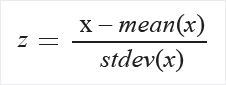

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalizando os dados utilizando standardScaler
# (Padroniza as features removendo a média e escala a variância a uma unidade.
# Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1)
X = StandardScaler().fit_transform(X)

df_padronizado = pd.DataFrame(data=X, columns=features)
display(df_padronizado.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Após padronizar os dados utilizando a Normalização Z, vamos de fato trabalhar a técnica do PCA.

Com o Sklearn vamos projetar os dados originais que possuem 4 dimensões em 2 dimensões. <br>
> *Dimensão = Componente Principal (resultado do PCA)*

In [25]:
# Importando o PCA da biblioteca sklearn
from sklearn.decomposition import PCA
# Instanciando o PCA e a quantidade de componenetes que desejamos obter
pca = PCA(n_components=2)
# Aplicando PCA nas nossas features
principalComponents = []
principalComponents = pca.fit_transform(X)

In [33]:
# Criando um novo dataframe para visualizar os dados reduzidos com o PCA
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

target = pd.Series(iris['target'], name='target')
result_df = pd.concat([df_pca, target], axis=1)
result_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


## Qualidade da minha redução de componentes

### Como podemos garantir que o PCA não omitiu informações essenciais para o meu modelo?

Existe uma métrica estatística chamada **Razão de Variância Explicada (Explained Variance Ratio)**, que quantifica quanto a variação em um conjunto de dados pode ser atribuída a cada um dos componentes principais em relação a média.

Auxilia na:
*   Escolha da quantidade de dimensões que devem ser mantidas.
*   Avaliação da qualidade d eum modelo de ML.

Em geral, um modelo com uma alta variância explicada tende a ter um bom poder de previsão, enquanto um modelo com uma baixa variância explicada pode não ser tão preciso. <br>
Porém, é importante ressaltar que a interpretação **depende** da pergunta que estamos tentando responder com os dados.

<br><br>

Vamos analisar como ficou a variabilidade de cada componente principal gerado pela técnica do PCA.






In [39]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100,2))

Variance of each component: [0.72962445 0.22850762]

Total variance Explained: 95.81


Analisando os resultados acima:

> PC1 - 0.72962445 <br>
PC2 - 0.22850762

O primeiro componente principal da sua análise é responsável por aproximadamente 72.96% da variância nos seus dados. Ou seja, esse único componenete principal captura 72.96% de informação ou estrutura dos dados em termo de variância.
O restante da variância é capturado por outros componentes (PC2, PC3, etc).

> Por que a soma não chega à 100%?

Existem mais componenetes principais que explicam o restante da variância, chegando à 100%. No entanto, esses componenetes adicionais na prática são frequentemente desconsiderados, pois contribuem muito pouco para a interpretação dos dados.


## Quantos componentes escolher para meu conjunto de dados?

Vamos visualizar como ficaria caso aumentasse o número de componentes principais a variância explicada:

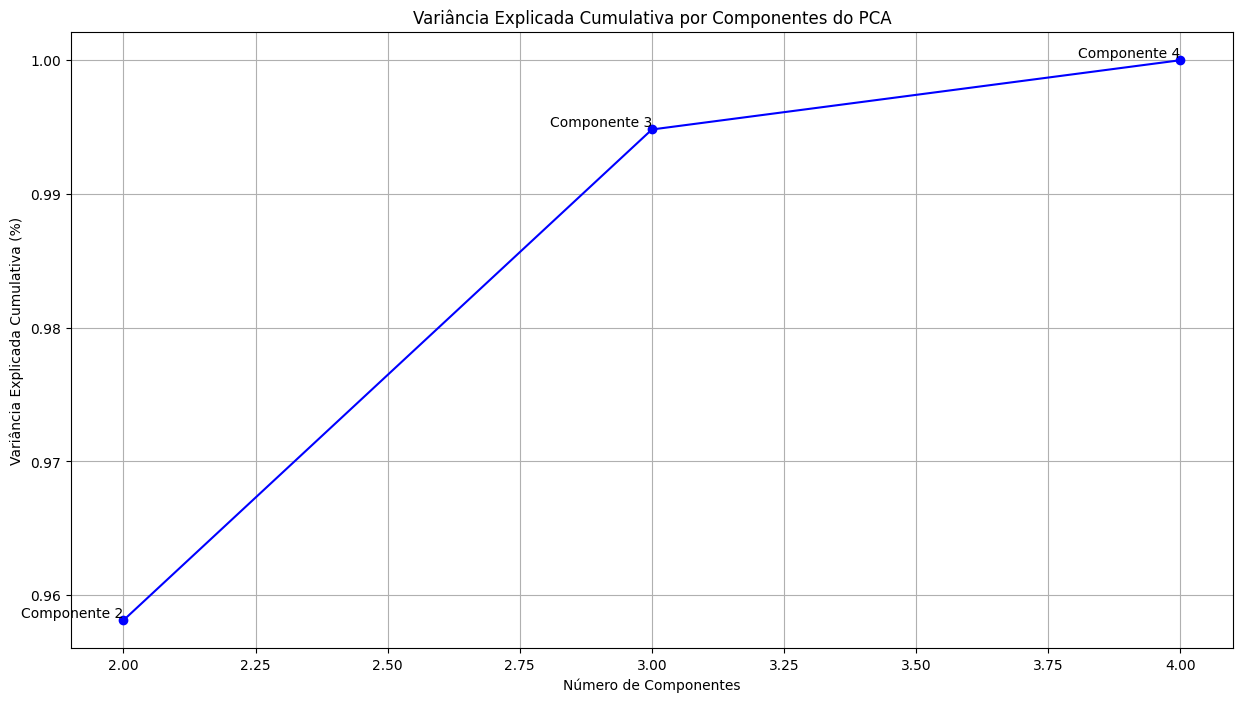

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

results = []

# Dados de exemplo (substitua pelo seu conjunto de dados X)
X = df_padronizado

for n in range(2, 5):
  # Crie o objeto PCA
  pca = PCA(n_components=n)
  # Ajuste o PCA aos seus dados
  pca.fit(X)
  # Calcule a variância explicada cumulativa e adicione aos resultados
  explained_variance = np.sum(pca.explained_variance_ratio_)
  results.append(explained_variance)

# Crie o gráfico
plt.figure(figsize=(15,8))
plt.plot(range(2,5), results, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa (%)')
plt.title('Variância Explicada Cumulativa por Componentes do PCA')
plt.grid(True)

# Adicione rótulos aos pontos de dados
for i, (n_components, explained_var) in enumerate(zip(range(2, 5), results)):
    plt.text(n_components, explained_var, f'Componente {n_components}', ha='right', va='bottom')

plt.show()

Ao utilizar o PCA, você decide quantos componentes principais manter dos seus dados originais. A escolha depende de equilibrar a simplificação dos dados com a retenção da informação. <br>
Geralmente, você opta por um número que capture uma grande parte da variabilidade dos dados, como 95% ou 99%, evitando incluir componentes desnecessários. A decisão final depende das necessidades do seu projeto e dos objetivos específicos de análise.